<a href="https://colab.research.google.com/github/ovidiu-vacaru/Machine-Learning-Algorithms/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear regression is a statistical method that models the relationship between a dependent variable and one or more independent variables. The goal is to find the best-fitting line that minimizes the differences between observed and predicted values.

Common methods to solve linear regression problems include:





Ordinary Least Squares (OLS),
Gradient Descent,
Ridge Regression (L2 Regularization),
Lasso Regression (L1 Regularization),
Elastic Net Regression,
Least Angle Regression (LARS),
Bayesian Linear Regression

In this notebook we'll focus primary on Ordinary Least Squares (OLS), LMS algorithm, and a probabilistic approach.




**LMS ALGORITHM**

The Least Mean Squares (LMS) regression aims to minimize the mean squared error (MSE) between the predicted output and the actual output. Given a dataset with input-output pairs $(x_i, y_i)$ for $i = 1, 2, \dots, N$, the LMS regression problem can be written in mathematical notation as follows:


$\hat{y}_i = w_0 + w_1 x_{i1} + w_2 x_{i2}$

$J(w) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 = \frac{1}{N} \sum_{i=1}^{N} (y_i - (w_0 + w_1 x_{i1} + w_2 x_{i2}))^2$

$w_j := w_j + \alpha (y_i - \hat{y}_i) x_{ij} \quad \text{for } j = 0, 1, 2$

We will generate a simple dataset with one feature which represents the number of rooms, for simplicity, and we'll assign some values, the goal is to fit a line to the data.

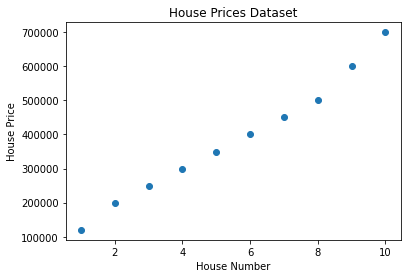

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a simple dataset with 1 feature (e.g., house prices)
house_prices = np.array([120000.0, 200000.0, 250000.0, 300000.0, 350000.0, 400000.0, 450000.0, 500000.0, 600000.0, 700000.0])

# Create corresponding indices (e.g., house numbers)
house_numbers = np.arange(1, len(house_prices) + 1)

# Plot the dataset
plt.scatter(house_numbers, house_prices)
plt.xlabel('House Number')
plt.ylabel('House Price')
plt.title('House Prices Dataset')
plt.show()


495879260.0


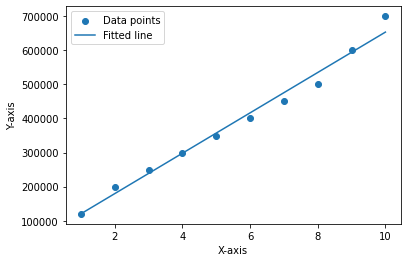

In [ ]:
import jax.numpy as jnp
from jax import grad, jit
from jax import random
import jax

def model(X, w, b):
    return jnp.dot(X, w) + b

X = jnp.array(house_numbers).reshape(-1, 1)
y = jnp.array(house_prices).reshape(-1, 1)

rng = random.PRNGKey(2)
w = 0.0
b = 0.0

@jax.jit
def loss_mse(X, w, b, y):
    return jnp.mean((model(X, w, b) - y)**2)

gradients = jax.jit(grad(loss_mse, argnums=(1, 2)))

for i in range(10000):
    grad_w, grad_b = gradients(X, w, b, y)
    w = w - 0.01 * grad_w
    b = b - 0.01 * grad_b

import matplotlib.pyplot as plt

plt.scatter(X, y, label='Data points')
plt.plot(X, model(X, w, b), label='Fitted line')
loss = loss_mse(X, w, b, y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()
